In [9]:
# Okay, here we will dive deeper into phosphor. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [11]:

query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


<Figure size 600x300 with 0 Axes>

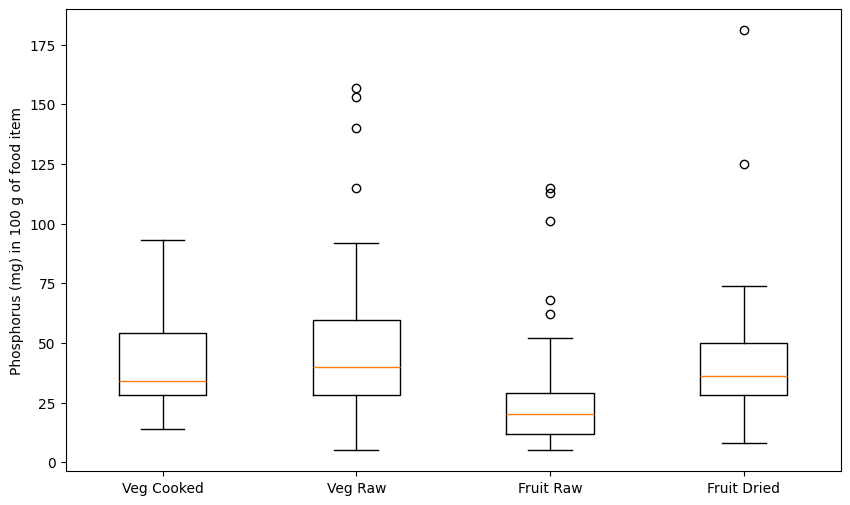

In [12]:
# Let's see how phosphor distributes between food in 100 g.


data = [df_v_vc['p_in_mg'], df_v_vr['p_in_mg'], df_v_fr['p_in_mg'], df_v_fd['p_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Phosphorus (mg) in 100 g of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [13]:
# Top raw vegetables comparing phophor content in 100 g

top = df_v_vr[['long_desc', 'p_in_mg']].sort_values(by="p_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                long_desc  p_in_mg
54                Seaweed, irishmoss, raw    157.0
29                            Garlic, raw    153.0
93                    Hearts of palm, raw    140.0
17                          Celeriac, raw    115.0
32                              Kale, raw     92.0
1      Artichokes, (globe or french), raw     90.0
81                Corn, sweet, white, raw     89.0
23               Corn, sweet, yellow, raw     89.0
65                              Taro, raw     84.0
76                   Seaweed, wakame, raw     80.0
31              Jerusalem-artichokes, raw     78.0
24                     Cress, garden, raw     76.0
6                      Broccoli raab, raw     73.0
43                          Parsnips, raw     71.0
0            Alfalfa seeds, sprouted, raw     70.0
7                   Brussels sprouts, raw     69.0
5                           Broccoli, raw     66.0
69  Waterchestnuts, chinese, (matai), raw     63.0
87                Cauliflower, 

In [14]:
# Top raw vegetables comparing phophor content in 100 kcal

top = df_v_vr[['long_desc', 'p_mg_in_100kcal']].sort_values(by='p_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)


                                            long_desc  p_mg_in_100kcal
70                                    Watercress, raw       545.454545
6                                  Broccoli raab, raw       331.818182
54                            Seaweed, irishmoss, raw       320.408163
0                        Alfalfa seeds, sprouted, raw       304.347826
12                   Cabbage, chinese (pak-choi), raw       284.615385
17                                      Celeriac, raw       273.809524
2                                      Asparagus, raw       260.000000
35  Lettuce, butterhead (includes boston and bibb ...       253.846154
19                                  Chard, swiss, raw       242.105263
73                 Squash, summer, all varieties, raw       237.500000
24                                 Cress, garden, raw       237.500000
60       Squash, summer, zucchini, includes skin, raw       223.529412
3                                  Bamboo shoots, raw       218.518519
57    

<Figure size 600x300 with 0 Axes>

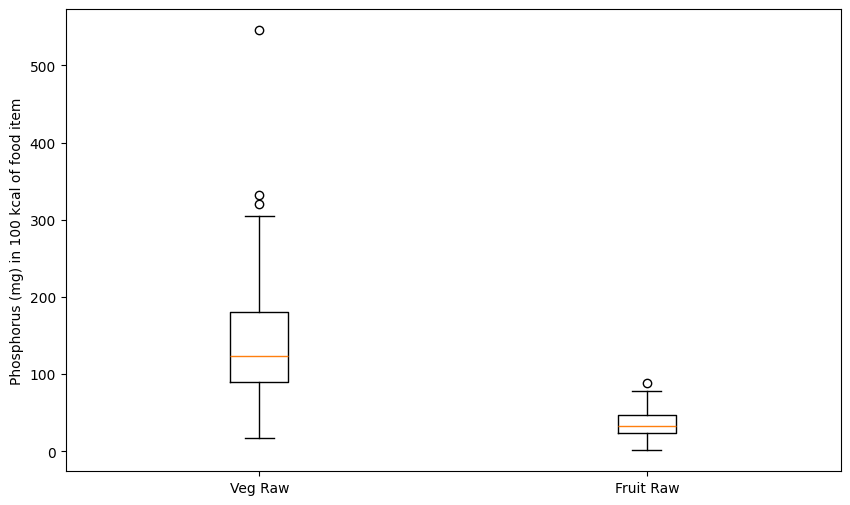

In [15]:
# Let's see how phoshphor content distributes between 100kcal of products:

data = [df_v_vr['p_mg_in_100kcal'], df_v_fr['p_mg_in_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Phosphorus (mg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()